<a href="https://colab.research.google.com/github/JemaaHela/test/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [1]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

     |████████████████████████████████| 301 kB 8.8 MB/s 
     |████████████████████████████████| 88 kB 4.0 MB/s 
     |████████████████████████████████| 56 kB 2.1 MB/s 
     |████████████████████████████████| 1.7 MB 11.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 116 kB 53.9 MB/s 
     |████████████████████████████████| 2.0 MB 55.5 MB/s 
     |████████████████████████████████| 167 kB 50.2 MB/s 
     |████████████████████████████████| 6.8 MB 51.2 MB/s 
     |████████████████████████████████| 1.3 MB 65.4 MB/s 
     |████████████████████████████████| 261 kB 64.2 MB/s 
     |████████████████████████████████| 16.8 MB 58.9 MB/s 
     |████████████████████████████████| 690 kB 46.3 MB/s 
     |████████████████████████████████| 303 kB 55.2 MB/s 
     |████████████████████████████████| 102 kB 10.5 MB/s 
     |█████████████████

In [2]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

The goal of this study is an accurate occupancy detection of an office room from light, temperature, humidity and CO2 measurements using statistical learning models.

The data set can be used for the tasks of classification and cluster analysis.

Target Information:

Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status.

Attribute Information:

To construct the data, five parameters of office rooms were measured:

1. Temperature, in Celsius T,
2. Relative Humidity, % H,
3. Light, in Lux L,
4. CO2, in ppm CO2,
5. Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air HRation
All of these parameters were real-valued continuous.

The occupancy Detection Data Set can be accessed via the following link:
https://archive.ics.uci.edu/ml/datasets/Occupancy+Detection+


In [5]:
#read cvs file into dataframe
df = pd.read_csv('occupancy.csv')
df = df[['Temperature','Humidity','Light','CO2','HumidityRatio','Occupancy']]
df = df.rename(columns={'Occupancy':'class'})
df = df.drop_duplicates()
df.head()

Temperature  Humidity  Light     CO2  HumidityRatio  class
0        23.18   27.2720  426.0  721.25       0.004793      1
1        23.15   27.2675  429.5  714.00       0.004783      1
2        23.15   27.2450  426.0  713.50       0.004779      1
3        23.15   27.2000  426.0  708.25       0.004772      1
4        23.10   27.2000  426.0  704.50       0.004757      1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7276 entries, 0 to 8142
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    7276 non-null   float64
 1   Humidity       7276 non-null   float64
 2   Light          7276 non-null   float64
 3   CO2            7276 non-null   float64
 4   HumidityRatio  7276 non-null   float64
 5   class          7276 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 397.9 KB


In [7]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [8]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

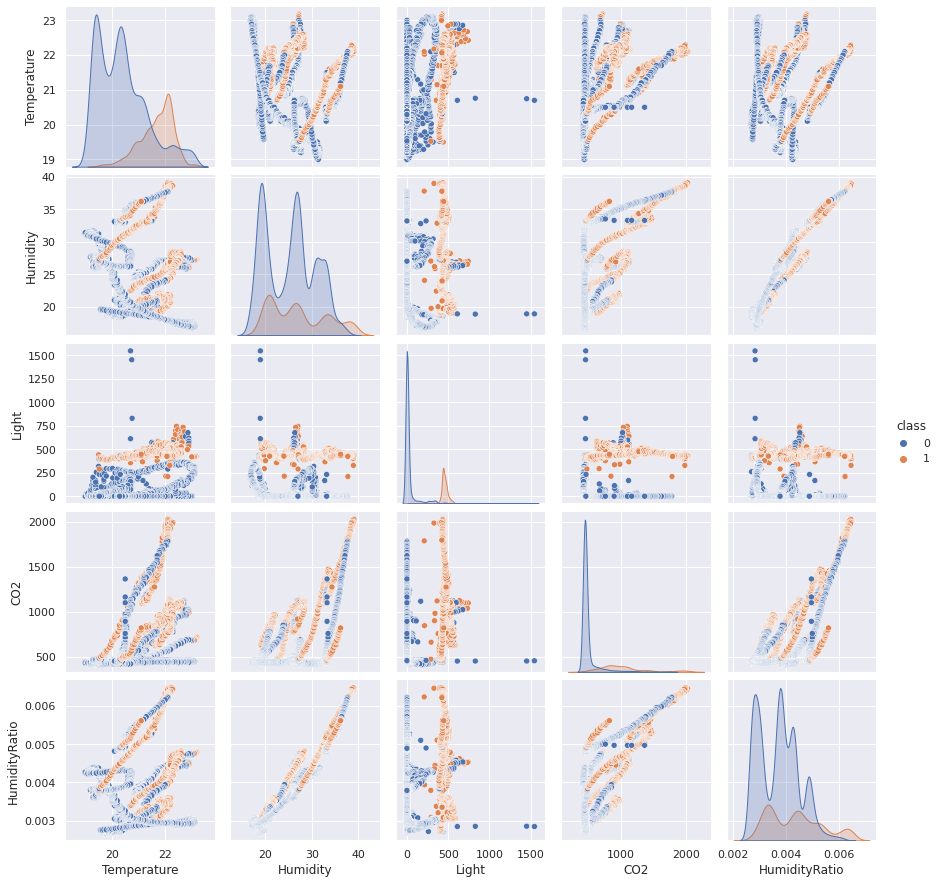

In [ ]:
sns.pairplot(df, hue='class')
plt.show()

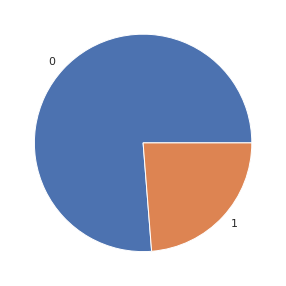

In [9]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [10]:
X = df.drop(columns=['class'])
X.head(10)

Temperature  Humidity  Light         CO2  HumidityRatio
0       23.180   27.2720  426.0  721.250000       0.004793
1       23.150   27.2675  429.5  714.000000       0.004783
2       23.150   27.2450  426.0  713.500000       0.004779
3       23.150   27.2000  426.0  708.250000       0.004772
4       23.100   27.2000  426.0  704.500000       0.004757
5       23.100   27.2000  419.0  701.000000       0.004757
6       23.100   27.2000  419.0  701.666667       0.004757
7       23.100   27.2000  419.0  699.000000       0.004757
8       23.100   27.2000  419.0  689.333333       0.004757
9       23.075   27.1750  419.0  688.000000       0.004745

**Display Features Histograms**

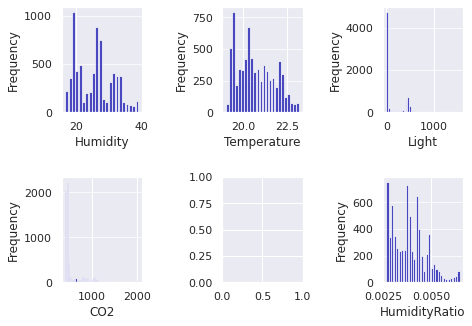

In [11]:
humidity = X['Humidity']
temperature = X['Temperature']
light = X['Light']
co2 = X['CO2']
humidityRatio = X['HumidityRatio']
fig, axs = plt.subplots(2, 3)
plt.subplot(2, 3, 1)
n, bins, patches = plt.hist(x=humidity, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Humidity')
plt.ylabel('Frequency')
#plt.title('Humidity')

plt.subplot(2, 3, 2)

n, bins, patches = plt.hist(x=temperature, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
#plt.title('Humidity')

plt.subplot(2, 3, 3)

n, bins, patches = plt.hist(x=light, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Light')
plt.ylabel('Frequency')
#plt.title('Light')

plt.subplot(2, 3, 4)

n, bins, patches = plt.hist(x=co2, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('CO2')
plt.ylabel('Frequency')
#plt.title('CO2')

plt.subplot(2, 3, 6)

n, bins, patches = plt.hist(x=humidityRatio, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('HumidityRatio')
plt.ylabel('Frequency')
#plt.title('HumidityRatio')
fig.tight_layout(pad=2.0)

In [12]:
X.describe().transpose()

count        mean         std         min         25%  \
Temperature    7276.0   20.690768    1.032511   19.000000   19.790000   
Humidity       7276.0   25.747889    5.563287   16.745000   20.365000   
Light          7276.0  133.685120  201.337046    0.000000    0.000000   
CO2            7276.0  624.841439  327.524863  412.750000  439.333333   
HumidityRatio  7276.0    0.003882    0.000860    0.002674    0.003101   

                      50%         75%          max  
Temperature     20.500000   21.500000    23.180000  
Humidity        26.200000   30.533333    39.117500  
Light            0.000000  357.375000  1546.333333  
CO2            455.666667  711.750000  2028.500000  
HumidityRatio    0.003808    0.004357     0.006476

**Standardize the Data**

In [13]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Temperature  Humidity     Light       CO2  HumidityRatio
0     2.411017  0.273977  1.451968  0.294375       1.059897
1     2.381960  0.273169  1.469353  0.272238       1.048793
2     2.381960  0.269124  1.451968  0.270711       1.044167
3     2.381960  0.261035  1.451968  0.254681       1.034915
4     2.333531  0.261035  1.451968  0.243230       1.018031
5     2.333531  0.261035  1.417198  0.232544       1.018031
6     2.333531  0.261035  1.417198  0.234579       1.018031
7     2.333531  0.261035  1.417198  0.226437       1.018031
8     2.333531  0.261035  1.417198  0.196920       1.018031
9     2.309317  0.256541  1.417198  0.192849       1.004490

In [14]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Temperature    7276.0  3.064756e-15  1.000069 -1.637643 -0.872465 -0.184774   
Humidity       7276.0 -3.070203e-15  1.000069 -1.618379 -0.967640  0.081272   
Light          7276.0  4.571507e-16  1.000069 -0.664032 -0.664032 -0.664032   
CO2            7276.0  5.162018e-17  1.000069 -0.647603 -0.566433 -0.516560   
HumidityRatio  7276.0  2.162036e-15  1.000069 -1.404595 -0.907854 -0.085782   

                    75%       max  
Temperature    0.783805  2.411017  
Humidity       0.860242  2.403350  
Light          1.111098  7.016817  
CO2            0.265368  4.285950  
HumidityRatio  0.553351  3.017460

**Observations and variables**

In [15]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

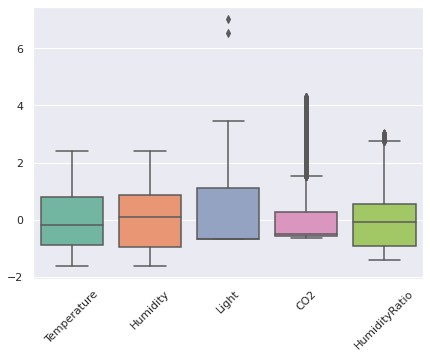

In [16]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

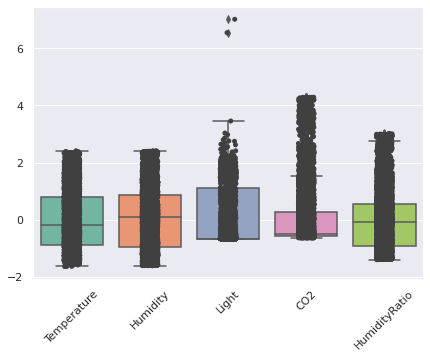

In [17]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

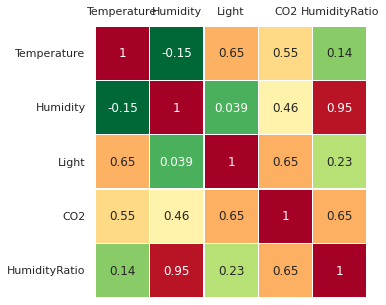

In [18]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

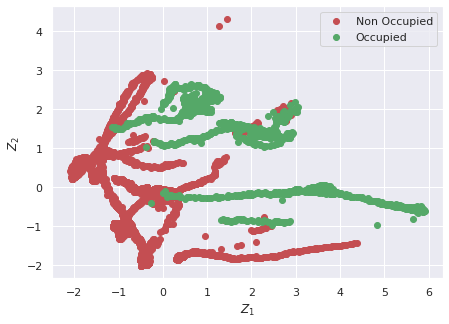

In [19]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(non_occupied)->0,  2(occupied)->1, 
idx_non_occupied = np.where(y == 0)
idx_occupied = np.where(y == 1)


plt. figure()
plt.scatter(Z[idx_non_occupied,0], Z[idx_non_occupied,1], c='r', label='Non Occupied')
plt.scatter(Z[idx_occupied,0], Z[idx_occupied,1], c='g', label='Occupied')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

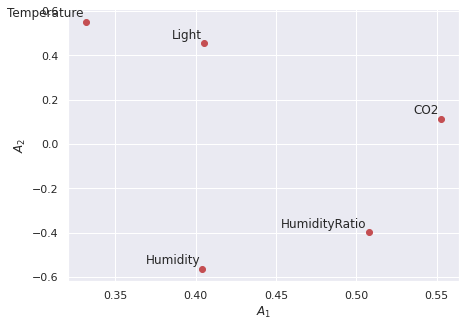

In [20]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


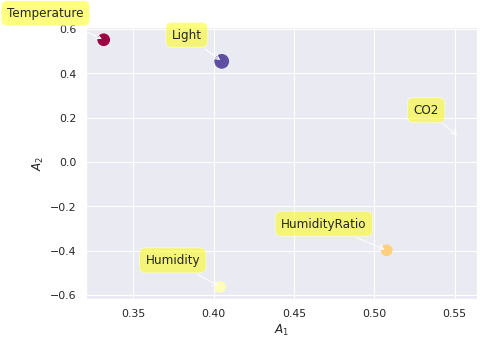

In [21]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

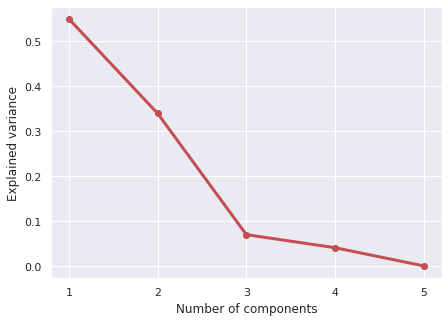

In [22]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

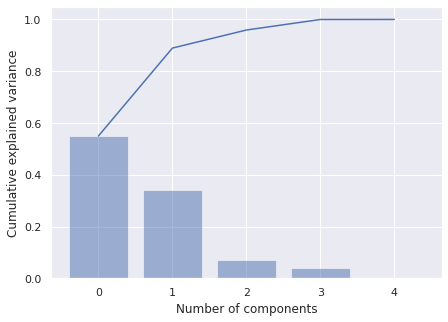

In [23]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

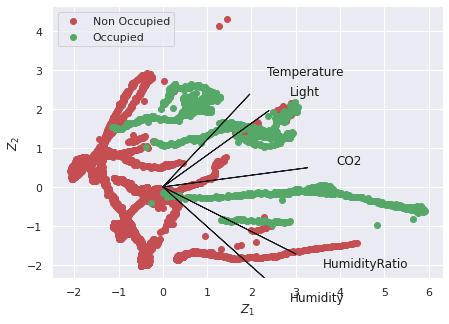

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')
plt.scatter(Z[idx_non_occupied,0], Z[idx_non_occupied,1], c='r', label='Non Occupied')
plt.scatter(Z[idx_occupied,0], Z[idx_occupied,1], c='g', label='Occupied')
plt.legend(loc='upper left')

##**Using PCA Library**

In [24]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=e74883faec4f4c1a5d2b7fecbcb3bbdeb157a09e23475c70f1d9b2aabead6242
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [25]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [26]:
out['PC']

PC1       PC2       PC3
0     2.198594  1.446027 -0.819776
1     2.177807  1.440245 -0.786698
2     2.165942  1.436298 -0.798185
3     2.149120  1.442711 -0.797518
4     2.118169  1.421419 -0.761618
...        ...       ...       ...
7271  2.744837 -0.911367  0.513187
7272  2.731754 -0.892787  0.516423
7273  2.789682 -0.888319  0.477919
7274  2.853736 -0.909374  0.476560
7275  2.873125 -0.867131  0.526930

[7276 rows x 3 columns]

**Scatter plot**

[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdf30b69ad0>)

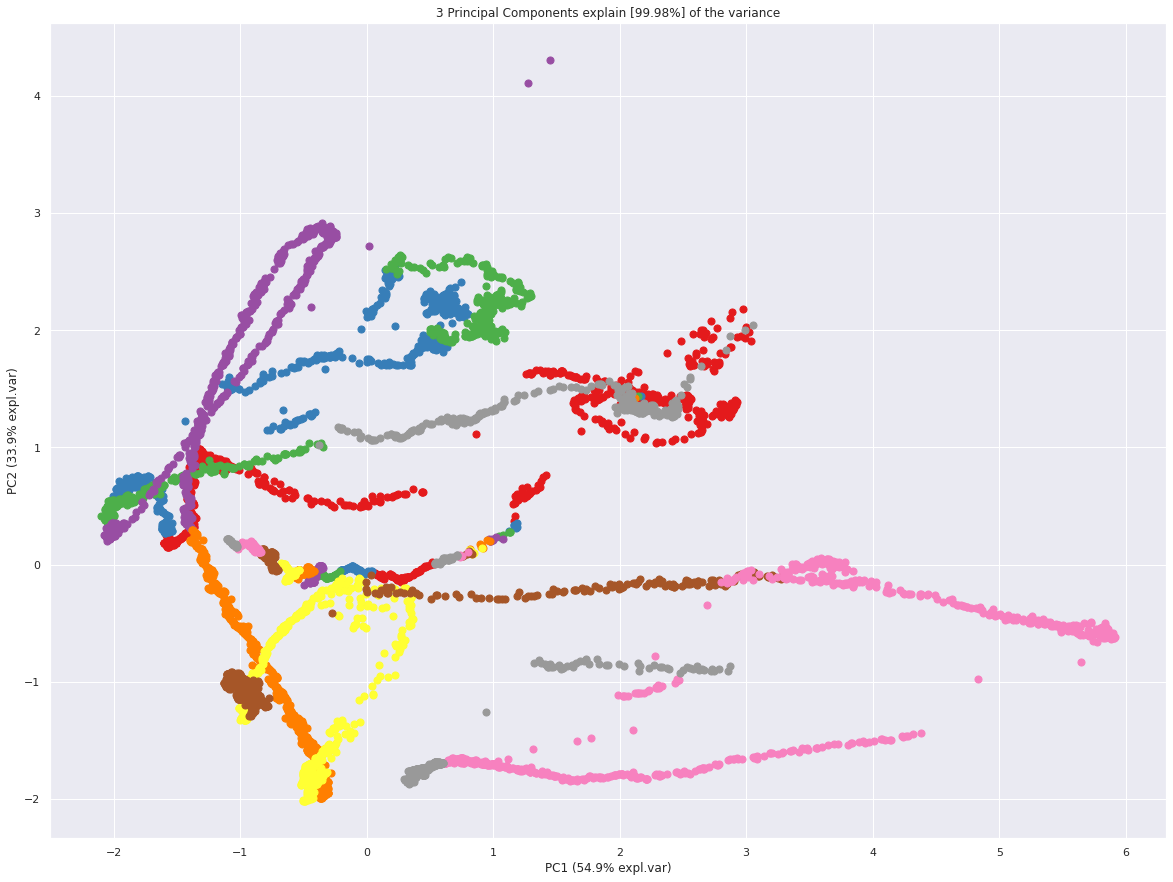

In [30]:
model.scatter(label=False, legend=False)

**Eigenvectors**

In [31]:
A = out['loadings'].T

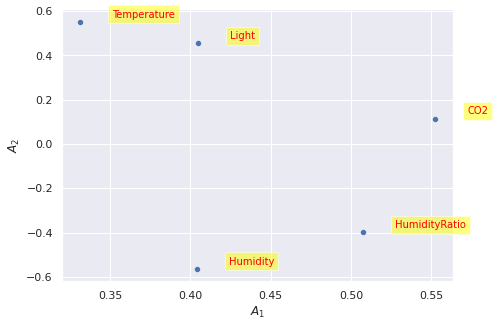

In [32]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

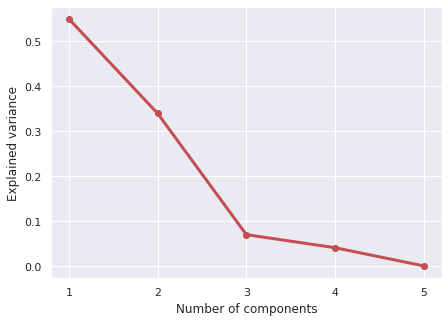

In [33]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

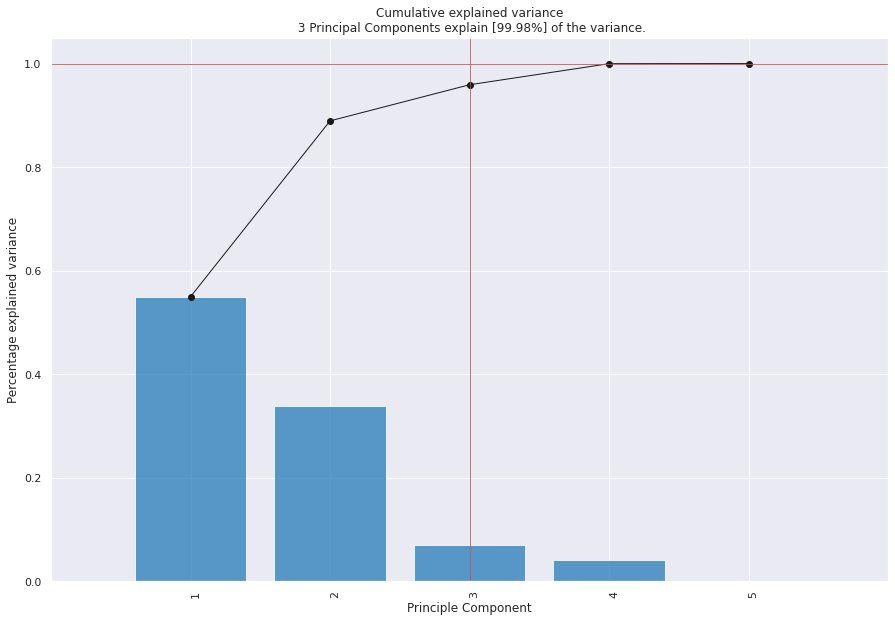

<Figure size 504x360 with 0 Axes>

In [34]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


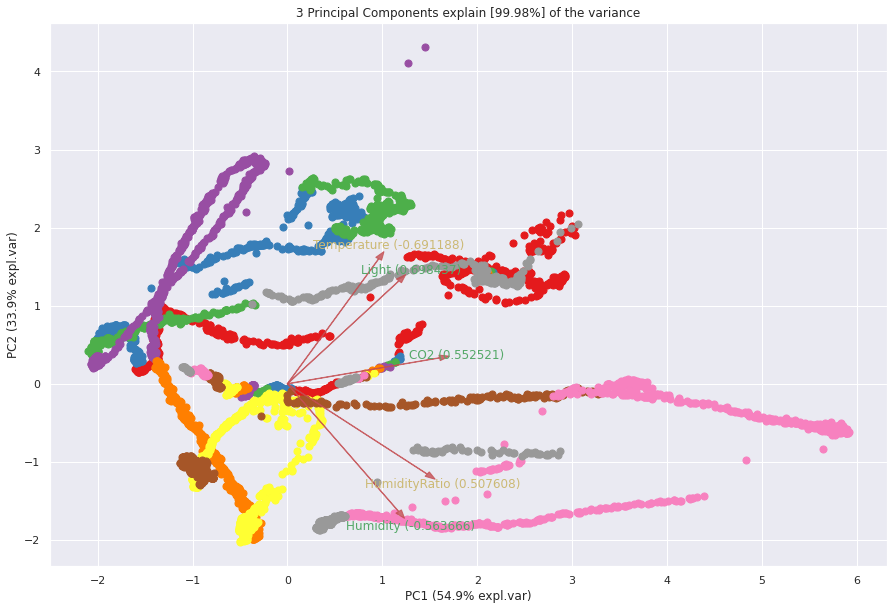

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f172587c4d0>)

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[pca] >Set parameter "label=None" to ignore the labels and significanly speed up the scatter plot.


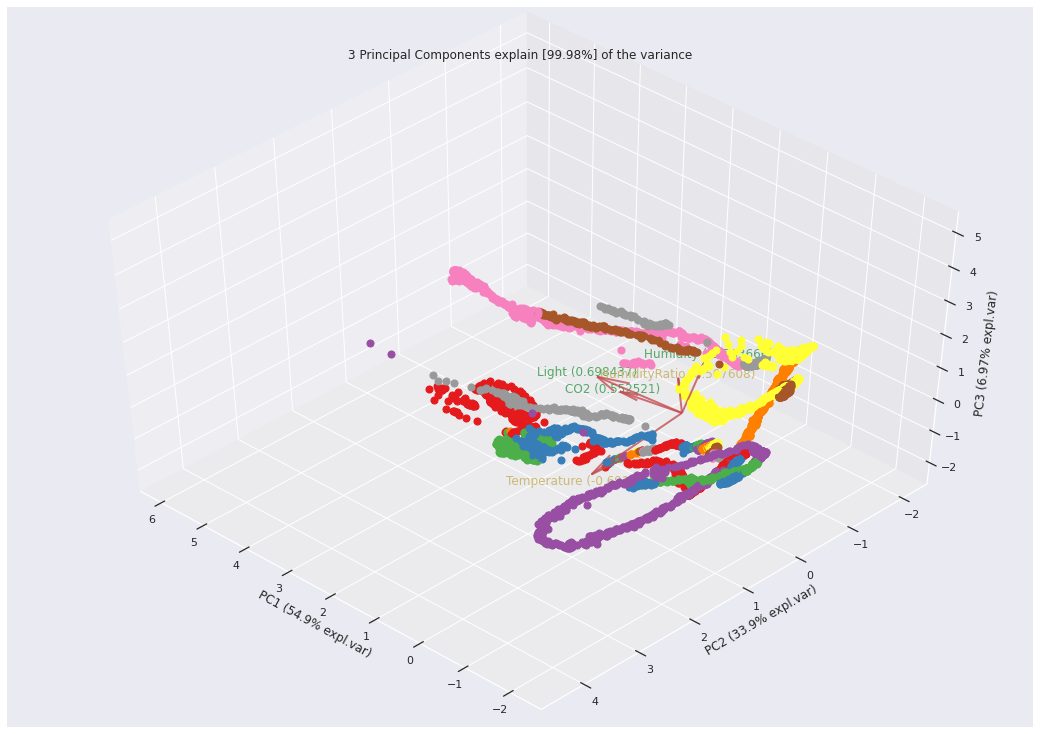

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7f171f2e2450>)

In [ ]:
model.biplot3d(label=False, legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [35]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [36]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (6548, 6)
Unseen Data For Predictions: (728, 6)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [37]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (6548, 6)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (4583, 5)
12                    Transformed Test Set         (1965, 5)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              c722
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

Once the setup has been succesfully executed it prints the information grid which contains several important pieces of information. Most of the information is related to the pre-processing pipeline which is constructed when setup() is executed. The majority of these features are out of scope for the purposes of this tutorial however a few important things to note at this stage include:

* **session_id** : A pseduo-random number distributed as a seed in all functions for later reproducibility. If no session_id is passed, a random number is automatically generated that is distributed to all functions. In this experiment, the session_id is set as 123 for later reproducibility.

* **Target Type** : Binary or Multiclass. The Target type is automatically detected and shown. There is no difference in how the experiment is performed for Binary or Multiclass problems. All functionalities are identical.

* **Label Encoded** : When the Target variable is of type string (i.e. 'Yes' or 'No') instead of 1 or 0, it automatically encodes the label into 1 and 0 and displays the mapping (0 : No, 1 : Yes) for reference. 

* **Original Data** : Displays the original shape of the dataset. In this experiment (189, 8) means 189 samples and 8 features including the class column.

* **Missing Values** : When there are missing values in the original data this will show as True. For this experiment there are no missing values in the dataset.

* **Numeric Features** : The number of features inferred as numeric. In this dataset, 7 out of 8 features are inferred as numeric.

* **Categorical Features** : The number of features inferred as categorical. In this dataset, there are no categorical features.

* **Transformed Train Set** : Displays the shape of the transformed training set. Notice that the original shape of (189, 8) is transformed into (132, 7) for the transformed train set.

* **Transformed Test Set** : Displays the shape of the transformed test/hold-out set. There are 57 samples in test/hold-out set. This split is based on the default value of 70/30 that can be changed using the train_size parameter in setup.

Notice how a few tasks that are imperative to perform modeling are automatically handled such as missing value imputation, categorical encoding etc. Most of the parameters in setup() are optional and used for customizing the pre-processing pipeline. 

**Comparing All Models**

In [38]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
et                 Extra Trees Classifier    0.9932  0.9996  0.9872  0.9845   
rf               Random Forest Classifier    0.9924  0.9989  0.9872  0.9810   
lightgbm  Light Gradient Boosting Machine    0.9924  0.9995  0.9863  0.9819   
gbc          Gradient Boosting Classifier    0.9921  0.9990  0.9863  0.9809   
dt               Decision Tree Classifier    0.9908  0.9868  0.9790  0.9826   
ada                  Ada Boost Classifier    0.9902  0.9992  0.9863  0.9731   
knn                K Neighbors Classifier    0.9871  0.9965  0.9927  0.9553   
ridge                    Ridge Classifier    0.9871  0.0000  0.9991  0.9497   
lr                    Logistic Regression    0.9867  0.9928  0.9973  0.9497   
lda          Linear Discriminant Analysis    0.9865  0.9919  0.9991  0.9472   
qda       Quadratic Discriminant Analysis    0.9863  0.9933  0.9909  0.9535   
nb                            Naive Bayes    0.9762  0.9930  0.9890  0.9180   
svm                   SVM - Linear Kernel    0.9738  0.0000  0.9690  0.9267   
dummy                    Dummy Classifier    0.7613  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
et        0.9858  0.9814  0.9814     0.513  
rf        0.9840  0.9790  0.9791     0.615  
lightgbm  0.9841  0.9790  0.9791     0.130  
gbc       0.9836  0.9784  0.9785     0.427  
dt        0.9808  0.9747  0.9748     0.021  
ada       0.9796  0.9731  0.9732     0.203  
knn       0.9736  0.9651  0.9654     0.130  
ridge     0.9738  0.9652  0.9658     0.016  
lr        0.9728  0.9640  0.9646     0.348  
lda       0.9724  0.9635  0.9641     0.020  
qda       0.9718  0.9627  0.9631     0.019  
nb        0.9521  0.9363  0.9376     0.017  
svm       0.9462  0.9290  0.9304     0.028  
dummy     0.0000  0.0000  0.0000     0.016

In [40]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this work, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* Extra tree Classifier ('et')
* Light Gradient Boosting Machine ('lightgbm')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [41]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9804  0.9715  0.9545  0.9633  0.9589  0.9460  0.9460
1       0.9935  0.9926  0.9909  0.9820  0.9864  0.9821  0.9821
2       0.9869  0.9790  0.9636  0.9815  0.9725  0.9639  0.9640
3       0.9978  0.9954  0.9908  1.0000  0.9954  0.9940  0.9940
4       0.9825  0.9728  0.9541  0.9720  0.9630  0.9515  0.9516
5       0.9978  0.9986  1.0000  0.9909  0.9954  0.9940  0.9940
6       0.9913  0.9880  0.9817  0.9817  0.9817  0.9759  0.9759
7       0.9934  0.9925  0.9908  0.9818  0.9863  0.9820  0.9820
8       0.9913  0.9880  0.9817  0.9817  0.9817  0.9759  0.9759
9       0.9934  0.9895  0.9818  0.9908  0.9863  0.9820  0.9820
Mean    0.9908  0.9868  0.9790  0.9826  0.9808  0.9747  0.9748
SD      0.0056  0.0088  0.0153  0.0096  0.0118  0.0154  0.0154

In [42]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a binary model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [43]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9869  0.9895  0.9636  0.9815  0.9725  0.9639  0.9640
1       0.9935  0.9939  0.9909  0.9820  0.9864  0.9821  0.9821
2       0.9913  0.9960  0.9818  0.9818  0.9818  0.9761  0.9761
3       0.9956  0.9970  1.0000  0.9820  0.9909  0.9880  0.9881
4       0.9913  0.9885  0.9817  0.9817  0.9817  0.9759  0.9759
5       0.9978  1.0000  1.0000  0.9909  0.9954  0.9940  0.9940
6       0.9913  0.9878  0.9817  0.9817  0.9817  0.9759  0.9759
7       0.9913  0.9983  1.0000  0.9646  0.9820  0.9762  0.9765
8       0.9934  0.9946  0.9908  0.9818  0.9863  0.9820  0.9820
9       0.9913  0.9936  0.9727  0.9907  0.9817  0.9759  0.9760
Mean    0.9924  0.9939  0.9863  0.9819  0.9840  0.9790  0.9791
SD      0.0028  0.0040  0.0117  0.0068  0.0059  0.0077  0.0077

In [44]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate tuned Decision Tree Model**

In [59]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

<Figure size 576x396 with 0 Axes>

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 5.3 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


How to analyze model performance using various plots

**Create LightGBM Model**

In [50]:
lightgbm = create_model('lightgbm')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9869  0.9993  0.9727  0.9727  0.9727  0.9641  0.9641
1       0.9935  0.9999  1.0000  0.9735  0.9865  0.9822  0.9824
2       0.9913  0.9991  0.9818  0.9818  0.9818  0.9761  0.9761
3       0.9934  0.9998  0.9817  0.9907  0.9862  0.9819  0.9819
4       0.9913  0.9987  0.9817  0.9817  0.9817  0.9759  0.9759
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9934  0.9998  0.9817  0.9907  0.9862  0.9819  0.9819
7       0.9934  0.9992  0.9908  0.9818  0.9863  0.9820  0.9820
8       0.9913  0.9998  1.0000  0.9646  0.9820  0.9762  0.9765
9       0.9891  0.9988  0.9727  0.9817  0.9772  0.9700  0.9700
Mean    0.9924  0.9995  0.9863  0.9819  0.9841  0.9790  0.9791
SD      0.0033  0.0004  0.0102  0.0097  0.0068  0.0090  0.0090

In [ ]:
#trained model object is stored in the variable 'lightgbm'. 
lightgbm

**Tune LightGBM Model**

In [51]:
tuned_lightgbm = tune_model(lightgbm)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9913  0.9994  0.9818  0.9818  0.9818  0.9761  0.9761
1       0.9935  0.9999  1.0000  0.9735  0.9865  0.9822  0.9824
2       0.9913  0.9992  0.9818  0.9818  0.9818  0.9761  0.9761
3       0.9956  0.9996  1.0000  0.9820  0.9909  0.9880  0.9881
4       0.9891  0.9994  0.9817  0.9727  0.9772  0.9700  0.9700
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.9869  0.9996  0.9633  0.9813  0.9722  0.9637  0.9637
7       0.9934  0.9985  0.9908  0.9818  0.9863  0.9820  0.9820
8       0.9934  0.9999  1.0000  0.9732  0.9864  0.9821  0.9823
9       0.9891  0.9991  0.9727  0.9817  0.9772  0.9700  0.9700
Mean    0.9924  0.9995  0.9872  0.9810  0.9840  0.9790  0.9791
SD      0.0036  0.0004  0.0124  0.0074  0.0075  0.0098  0.0098

In [52]:
#tuned model object is stored in the variable 'tuned_lightgbm'. 
tuned_lightgbm

LGBMClassifier(bagging_fraction=0.9, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.4, max_depth=-1,
               min_child_samples=6, min_child_weight=0.001, min_split_gain=0.3,
               n_estimators=20, n_jobs=-1, num_leaves=150, objective=None,
               random_state=123, reg_alpha=0.005, reg_lambda=0.0005,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [58]:
evaluate_model(lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Evaluate the tuned Lightgbm Model**

In [57]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [46]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9804  0.9947  0.9818  0.9391  0.9600  0.9470  0.9474
1       0.9869  0.9947  1.0000  0.9483  0.9735  0.9648  0.9654
2       0.9891  0.9976  0.9909  0.9646  0.9776  0.9704  0.9705
3       0.9913  0.9957  1.0000  0.9646  0.9820  0.9762  0.9765
4       0.9847  0.9953  0.9908  0.9474  0.9686  0.9585  0.9589
5       0.9956  0.9990  1.0000  0.9820  0.9909  0.9880  0.9881
6       0.9891  0.9955  1.0000  0.9561  0.9776  0.9704  0.9708
7       0.9847  0.9947  0.9908  0.9474  0.9686  0.9585  0.9589
8       0.9847  0.9924  1.0000  0.9397  0.9689  0.9588  0.9596
9       0.9847  0.9946  0.9909  0.9478  0.9689  0.9588  0.9592
Mean    0.9871  0.9954  0.9945  0.9537  0.9736  0.9651  0.9655
SD      0.0041  0.0017  0.0060  0.0126  0.0083  0.0110  0.0108

In [47]:
best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [48]:
tuned_best_model

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [55]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Evaluate the Tuned Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [56]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [60]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target             class
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data         (6548, 6)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set         (4583, 3)
12                    Transformed Test Set         (1965, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              6406
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

In [61]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.9921  0.9990  0.9881  0.9792   
et                 Extra Trees Classifier    0.9919  0.9995  0.9890  0.9775   
rf               Random Forest Classifier    0.9904  0.9991  0.9881  0.9722   
knn                K Neighbors Classifier    0.9893  0.9971  0.9854  0.9704   
gbc          Gradient Boosting Classifier    0.9887  0.9982  0.9890  0.9645   
dt               Decision Tree Classifier    0.9876  0.9827  0.9735  0.9745   
ridge                    Ridge Classifier    0.9871  0.0000  0.9991  0.9497   
lda          Linear Discriminant Analysis    0.9871  0.9924  0.9991  0.9497   
ada                  Ada Boost Classifier    0.9869  0.9962  0.9945  0.9528   
svm                   SVM - Linear Kernel    0.9852  0.0000  0.9918  0.9485   
qda       Quadratic Discriminant Analysis    0.9847  0.9933  0.9872  0.9509   
lr                    Logistic Regression    0.9843  0.9930  0.9872  0.9492   
nb                            Naive Bayes    0.9804  0.9928  0.9625  0.9557   
dummy                    Dummy Classifier    0.7613  0.5000  0.0000  0.0000   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.9836  0.9785  0.9785     0.123  
et        0.9832  0.9779  0.9779     0.515  
rf        0.9801  0.9737  0.9738     0.617  
knn       0.9778  0.9707  0.9709     0.127  
gbc       0.9766  0.9691  0.9693     0.432  
dt        0.9739  0.9658  0.9658     0.022  
ridge     0.9738  0.9652  0.9658     0.016  
lda       0.9738  0.9652  0.9658     0.021  
ada       0.9732  0.9645  0.9650     0.202  
svm       0.9696  0.9598  0.9603     0.021  
qda       0.9686  0.9585  0.9589     0.018  
lr        0.9678  0.9574  0.9578     0.359  
nb        0.9590  0.9461  0.9462     0.018  
dummy     0.0000  0.0000  0.0000     0.015

In [62]:
best_model_pca

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

**Tune the Best Model**

In [63]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9891  0.9978  0.9909  0.9646  0.9776  0.9704  0.9705
1       0.9913  0.9990  1.0000  0.9649  0.9821  0.9764  0.9767
2       0.9891  0.9996  0.9909  0.9646  0.9776  0.9704  0.9705
3       0.9956  0.9986  1.0000  0.9820  0.9909  0.9880  0.9881
4       0.9803  0.9982  0.9633  0.9545  0.9589  0.9460  0.9460
5       0.9934  0.9984  1.0000  0.9732  0.9864  0.9821  0.9823
6       0.9891  0.9995  0.9817  0.9727  0.9772  0.9700  0.9700
7       0.9825  0.9984  1.0000  0.9316  0.9646  0.9530  0.9541
8       0.9869  0.9988  0.9908  0.9558  0.9730  0.9643  0.9646
9       0.9869  0.9988  0.9909  0.9561  0.9732  0.9645  0.9648
Mean    0.9884  0.9987  0.9909  0.9620  0.9761  0.9685  0.9688
SD      0.0044  0.0005  0.0109  0.0131  0.0090  0.0119  0.0118

In [64]:
tuned_best_model_pca

LGBMClassifier(bagging_fraction=0.6, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
               importance_type='split', learning_rate=0.05, max_depth=-1,
               min_child_samples=96, min_child_weight=0.001, min_split_gain=0.7,
               n_estimators=180, n_jobs=-1, num_leaves=10, objective=None,
               random_state=123, reg_alpha=0.0001, reg_lambda=0.1,
               silent='warn', subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [65]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

**Create DT Model with PCA**

In [66]:
dt_pca = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9847  0.9806  0.9727  0.9640  0.9683  0.9583  0.9583
1       0.9847  0.9775  0.9636  0.9725  0.9680  0.9580  0.9580
2       0.9891  0.9804  0.9636  0.9907  0.9770  0.9698  0.9700
3       0.9869  0.9882  0.9908  0.9558  0.9730  0.9643  0.9646
4       0.9825  0.9728  0.9541  0.9720  0.9630  0.9515  0.9516
5       0.9956  0.9940  0.9908  0.9908  0.9908  0.9880  0.9880
6       0.9891  0.9865  0.9817  0.9727  0.9772  0.9700  0.9700
7       0.9869  0.9851  0.9817  0.9640  0.9727  0.9641  0.9642
8       0.9891  0.9834  0.9725  0.9815  0.9770  0.9698  0.9698
9       0.9869  0.9789  0.9636  0.9815  0.9725  0.9639  0.9640
Mean    0.9876  0.9827  0.9735  0.9745  0.9739  0.9658  0.9658
SD      0.0034  0.0057  0.0118  0.0110  0.0071  0.0093  0.0093

**Tune DT Model with PCA**

In [67]:
tuned_dt_pca = tune_model(dt_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9891  0.9983  0.9727  0.9817  0.9772  0.9700  0.9700
1       0.9782  0.9896  0.9364  0.9717  0.9537  0.9395  0.9397
2       0.9869  0.9903  0.9727  0.9727  0.9727  0.9641  0.9641
3       0.9913  0.9977  0.9817  0.9817  0.9817  0.9759  0.9759
4       0.9825  0.9876  0.9541  0.9720  0.9630  0.9515  0.9516
5       0.9934  0.9997  0.9908  0.9818  0.9863  0.9820  0.9820
6       0.9803  0.9976  0.9358  0.9808  0.9577  0.9450  0.9454
7       0.9869  0.9890  0.9817  0.9640  0.9727  0.9641  0.9642
8       0.9825  0.9971  0.9541  0.9720  0.9630  0.9515  0.9516
9       0.9847  0.9899  0.9636  0.9725  0.9680  0.9580  0.9580
Mean    0.9856  0.9937  0.9644  0.9751  0.9696  0.9602  0.9603
SD      0.0046  0.0045  0.0180  0.0058  0.0099  0.0129  0.0128

**Evaluate tuned DT Model with PCA**

In [71]:
evaluate_model(tuned_dt_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create ET Model with PCA**

In [68]:
et_pca = create_model('et')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9891  0.9996  0.9818  0.9730  0.9774  0.9702  0.9702
1       0.9935  0.9999  0.9909  0.9820  0.9864  0.9821  0.9821
2       0.9913  0.9998  0.9818  0.9818  0.9818  0.9761  0.9761
3       0.9978  0.9998  1.0000  0.9909  0.9954  0.9940  0.9940
4       0.9891  0.9990  0.9817  0.9727  0.9772  0.9700  0.9700
5       0.9978  1.0000  1.0000  0.9909  0.9954  0.9940  0.9940
6       0.9891  0.9996  0.9817  0.9727  0.9772  0.9700  0.9700
7       0.9913  0.9979  0.9908  0.9730  0.9818  0.9761  0.9761
8       0.9913  0.9998  1.0000  0.9646  0.9820  0.9762  0.9765
9       0.9891  0.9995  0.9818  0.9730  0.9774  0.9702  0.9702
Mean    0.9919  0.9995  0.9890  0.9775  0.9832  0.9779  0.9779
SD      0.0032  0.0006  0.0080  0.0082  0.0068  0.0089  0.0089

**Tune ET Model with PCA**

In [69]:
tuned_et_pca = tune_model(et_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.9847  0.9895  1.0000  0.9402  0.9692  0.9590  0.9599
1       0.9869  0.9931  1.0000  0.9483  0.9735  0.9648  0.9654
2       0.9891  0.9968  1.0000  0.9565  0.9778  0.9706  0.9710
3       0.9913  0.9933  1.0000  0.9646  0.9820  0.9762  0.9765
4       0.9825  0.9899  0.9908  0.9391  0.9643  0.9527  0.9533
5       0.9913  0.9954  1.0000  0.9646  0.9820  0.9762  0.9765
6       0.9869  0.9924  1.0000  0.9478  0.9732  0.9646  0.9652
7       0.9825  0.9900  1.0000  0.9316  0.9646  0.9530  0.9541
8       0.9847  0.9852  1.0000  0.9397  0.9689  0.9588  0.9596
9       0.9869  0.9905  1.0000  0.9483  0.9735  0.9648  0.9654
Mean    0.9867  0.9916  0.9991  0.9481  0.9729  0.9641  0.9647
SD      0.0030  0.0031  0.0028  0.0105  0.0060  0.0080  0.0078

**Evaluate ET Model with PCA**

In [70]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Explainable AI with Shapley values**

Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [74]:
!pip install shap

     |████████████████████████████████| 564 kB 8.6 MB/s 


In [75]:
import shap

**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

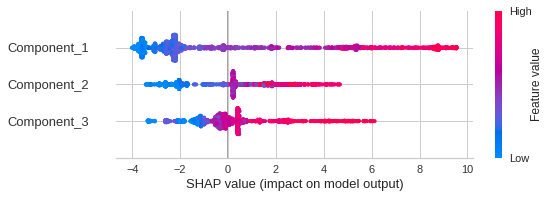

In [76]:
interpret_model(tuned_best_model_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [78]:
interpret_model(tuned_best_model_pca, plot='reason', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

In [ ]:
interpret_model(tuned_rf_pca, plot='reason')